# Answering the questions

✔️ Answer the questions below (briefly):

🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

- because linear regression is usually used to predict continuous values but classification is used to predict discrete values, and linear regression is senstive to outliers.

- logistic regression is usually used for classification task and A perceptron's used as binary classifier like logistic regression but the difference is that perceptron uses step activation function.

- both logistic regression and preceptron are better than linear regression in classification task.




🌈What's a decision tree and how it is different to a logistic regression model?

- A decision tree is a supervised machine learning that categorizes or predicts outcomes based on the answers to a previous set of questions.

- It has a tree-like structure with branches and nodes that represent different outcomes or decisions.

**The difference between decision tree and logistic regression is that:** 
- logistic regression assumes that the data is linearly separable in space.

- decision tree is a non-linear classifier.

- Decision trees can handle categorical data better, while logistic regression can handle continuous data better.


🌈What's the difference between grid search and random search?

- Grid search tries every possible hyperparameter combination to find the best one, but it is very slow to run.

- Random search randomly picks hyperparameter combinations from a grid and evaluates the model performance. It is faster than grid search, but it may not find the optimal hyperparameters.

🌈What's the difference between bayesian search and random search?

- Bayesian search is an optimization algorithm that sequentially uses a model-based approach to determine the next hyperparameter value based on the results of the previous iteration.

- Random search uses a grid of hyperparameter values and selects random combinations for training and scoring the model.

- In terms of finding the best hyperparameters, Bayesian search outperforms random search and is faster than grid search

# Problem Formulation:

## Problem description

- building a machine learning model to predict the probability (0-1, float) output that the dating will match. 

- inputs : (191 features) for both training set (5909 observations) and (9842 observations) after the oversampling and test set (2469 observations) 

- output : 1 feature 2469 observations as output (Using Test Data).

## Model
- classification and prediction


## Challenges

- that our dataset has a lot of null values 

- that the is an imbalanced dataset a lot 0's and less of 1's


## Model impact

- It help people to meet their suitable partners 


## The ideal solution

- Using a XGBClassifierr with random search to search for the best hyperparameters combinations to get better ROC-AUC result on the test data is (88.835%)

# Importing Libraries and check data

In [ ]:
!pip install scikit-optimize

In [ ]:
!pip install imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler , StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from pandas.core.arrays import numeric
from sklearn.model_selection import train_test_split
from skopt.space import Categorical ,Integer ,Real
from sklearn.pipeline import Pipeline
from pandas.core.arrays import numeric
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load Data
df_train= pd.read_csv("train.csv", index_col='id')
df_train.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
id,,,,,,,,,,,,,,,,,,,,,
2583,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6830,1,14,1,3,10,2,NaN,8,8,63.0,...,6.0,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
4840,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5508,1,38,2,9,20,18,13.0,6,7,200.0,...,8.0,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN
4828,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test= pd.read_csv("test.csv", index_col='id')
df_test.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
id,,,,,,,,,,,,,,,,,,,,,
934,0,5,2,2,16,3,NaN,13,13,52.0,...,5.0,7.0,8.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN
6539,0,33,2,14,18,6,6.0,4,8,368.0,...,6.0,8.0,7.0,7.0,8.0,6.0,7.0,6.0,5.0,5.0
6757,1,6,2,9,20,10,16.0,15,19,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2275,1,26,2,2,19,15,NaN,8,10,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1052,0,29,2,7,16,7,7.0,10,5,162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check the Shape of the training and test Data**

In [ ]:
print("Training Date Shape: ", df_train.shape)
print("Testing Date Shape: ", df_test.shape)

Training Date Shape:  (5909, 191)
Testing Date Shape:  (2469, 190)


# Part 1: Data Preprocessing

In [ ]:
df_train.dtypes.value_counts()

float64    173
int64       10
object       8
dtype: int64

In [ ]:
# Checking the target Column
df_train[['match']].value_counts()

match
0        4921
1         988
dtype: int64

<AxesSubplot:xlabel='count', ylabel='match'>

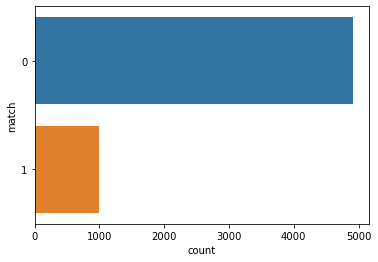

In [ ]:
# We Can See that the data is Imbalanced
sns.countplot(y="match", data=df_train)

In [ ]:
# Checking The Null values
sum(df_train.isnull().sum())

304971

In [ ]:
sum(df_test.isnull().sum())

127044

In [ ]:
df_train.select_dtypes(include=['object'])

,field,undergra,mn_sat,tuition,from,zipcode,income,career
id,,,,,,,,
2583,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"1,290.00","21,645.00","Palo Alto, CA",NaN,NaN,University President
6830,Engineering,NaN,NaN,NaN,"Boston, MA","2,021",NaN,Engineer or iBanker or consultant
4840,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,NaN,"Bombay, India",NaN,NaN,Real Estate Consulting
5508,International Affairs,NaN,NaN,NaN,"Washington, DC","10,471","45,300.00",public service
4828,Business,Harvard College,"1,400.00","26,019.00",Midwest USA,"66,208","46,138.00",undecided
...,...,...,...,...,...,...,...,...
3390,Clinical Psychology,NaN,NaN,NaN,New York,"11,803","65,708.00",Psychologist
4130,MBA,NaN,NaN,NaN,Colombia,NaN,NaN,Consulting
1178,MA Science Education,University of Washington,"1,155.00","13,258.00",Seattle,"98,115","37,881.00",Teacher


In [ ]:
# Remove string Column to convert it to Number
df_train.mn_sat = df_train.mn_sat.str.replace((","), (""))
df_train.income = df_train.income.str.replace((","), (""))

df_test.mn_sat = df_test.mn_sat.str.replace((","), (""))
df_test.income = df_test.income.str.replace((","), (""))

# Convert to float
df_train[["mn_sat"]] = df_train[["mn_sat"]].astype(float)
df_train[["income"]] = df_train[["income"]].astype(float)

df_test[["mn_sat"]] = df_test[["mn_sat"]].astype(float)
df_test[["income"]] = df_test[["income"]].astype(float)

# Fill the Missing Values with the mean
df_train.mn_sat = df_train.mn_sat.fillna(df_train.mn_sat.mean())
df_train.income = df_train.income.fillna(df_train.income.mean())

df_test.mn_sat = df_test.mn_sat.fillna(df_test.mn_sat.mean())
df_test.income = df_test.income.fillna(df_test.income.mean())

In [ ]:
# Fill the Missing Values with the mode
df_train['from'] = df_train['from'].fillna(df_train['from'].mode()[0])
df_train['from'] = df_train['from'].str.upper()

df_test['from'] = df_test['from'].fillna(df_test['from'].mode()[0])
df_test['from'] = df_test['from'].str.upper()

In [ ]:
# Fill the Missing Values with the Constant
df_train['field_cd'] = df_train['field_cd'].fillna(18)
df_train['race'] = df_train['race'].fillna(6)
df_train['race_o'] = df_train['race_o'].fillna(6)
df_train['career_c'] = df_train['career_c'].fillna(15)
df_train['field_cd'] = df_train['field_cd'].fillna(18)
df_train['goal'] = df_train['goal'].fillna(6)


df_test['field_cd'] = df_test['field_cd'].fillna(18)
df_test['race'] = df_test['race'].fillna(6)
df_test['race_o'] = df_test['race_o'].fillna(6)
df_test['career_c'] = df_test['career_c'].fillna(15)
df_test['field_cd'] = df_test['field_cd'].fillna(18)
df_test['goal'] = df_test['goal'].fillna(6)

In [ ]:
obj_tr=df_train.select_dtypes(include=['object']) 
obj_ts=df_test.select_dtypes(include=['object']) 

#categorical encoding of all object data
for i in obj_tr:
    df_train[i]=df_train[i].astype("category")

#categorical encoding of all object data
for i in obj_ts:
    df_test[i]=df_test[i].astype("category")

In [ ]:
X_train = df_train.drop(['match'], axis=1)
y_train = df_train.match

In [ ]:
# RandomOverSampleris used for imbalanced data so the number of labels are equal.
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
print("Training Date Shape: ", X_train.shape)
print("Label Date Shape: ", y_train.shape)

Training Date Shape:  (9842, 190)
Label Date Shape:  (9842,)


#Part 2: Building The Models

## **Here I Will Do 6 Trials**,  

### **Using 2 Models Which Are XGBoost And RandomForest.**



**Each Model I Will Use RadomSearch, GridSearch And Finally BayesSearch, But What is The Difference Between those 3 Search Methodes ?**


- **Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It is similar to grid search, and yet it has proven to yield better results comparatively.**


- **Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.**


- **Bayesian optimization methods are efficient because they select hyperparameters in an informed manner. By prioritizing hyperparameters that appear more promising from past results, Bayesian methods can find the best hyperparameters in lesser time (in fewer iterations) than both grid search and random search.**



## A Tunable Pipeline

In [ ]:
# Get Numeric features to featureNumeric
featureNumeric = list(X_train.select_dtypes(include=['float64','int64']))

# Get Categorical features to featuresCategorical
featuresCategorical=list(X_train.select_dtypes(include=['category']))

In [ ]:
# Create a pipline for numerical features and select it's hyperparameters
numeric = Pipeline(
    steps=[
           ('imputer', SimpleImputer(strategy='mean')), # SimpleImputer used to handel missing value and have strategy='mean' is default val that means fill nan value with mean
           ('scaler', StandardScaler())  # StandardScaler used to scale number
    ]
)

categorical=Pipeline(
    steps=[
           ('imputer',SimpleImputer(strategy='constant')), # SimpleImputer used to handel missing value and have strategy='constant' that means fill nan value with constant
            ('onehot',OneHotEncoder(handle_unknown='ignore'))# OneHotEncoder used to encode categorical data
    ]
)
# ColumnTransformer used to construct and apply separate numerical and categorical data transformers.
# Select and prepare the columns of the dataset before fitting a model to the modified data.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric, featureNumeric),# Numerical data
        ('cat', categorical, featuresCategorical) # Categorical data
    ]
)
# Put the preprocessing a siutable classifier.
full_piplinex = Pipeline(  
    steps=[
        ('preprocessor', preprocessor), 
        ('my_classifier', 
           XGBClassifier(), # XGBClassifier as a classifier.
        )
    ]
)
full_piplinex

full_pipliner = Pipeline(  
    steps=[
        ('preprocessor', preprocessor), 
        ('my_classifier', 
           RandomForestClassifier(), # RandomForestClassifier as a classifier.
        )
    ]
)
full_pipliner

np.random.seed(0)  # used to make the random numbers predictable


In [ ]:
# Fitting and predict The pipeline object.
full_piplinel = full_piplinex.fit(X_train, y_train)
full_piplinel.predict(df_test)

array([0, 1, 0, ..., 0, 0, 0])

## XGBoost Model

**XGBoost (eXtreme Gradient Boosting) is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.**

**XGBoost consists of a number of hyper-parameters that can be tuned — a primary advantage over gradient boosting machines. XGBoost has an in-built capability to handle missing values. It provides various intuitive features, such as parallelisation, distributed computing, cache optimisation, and more.**



In [ ]:
# Define parameters for RandomSearch for XGBoost
xgb_param = {
  'my_classifier__n_estimators': [450,500],
  'my_classifier__max_depth': [8,10],
  'my_classifier__learning_rate': [0.01, 0.1, 0.2],
  'my_classifier__gamma': [0, 0.1, 0.2],
  'my_classifier__subsample': [0.8, 0.9, 1]
}
# Create RandomizedSearch objects
xgb_random = RandomizedSearchCV(full_piplinex, xgb_param, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)

# Get best models
xgb_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [ ]:
# Get best parameters
xgb_random.best_params_

{'my_classifier__subsample': 0.9,
 'my_classifier__n_estimators': 500,
 'my_classifier__max_depth': 8,
 'my_classifier__learning_rate': 0.1,
 'my_classifier__gamma': 0}

In [ ]:
# Get best score
xgb_random.best_score_

0.9980082785506573

In [ ]:
# Define parameters for BayesSearch for XGBoost
xgb_param_bayes = {
  'my_classifier__n_estimators': Categorical([400,500]),
  'my_classifier__max_depth': Integer(3,100),
  'my_classifier__learning_rate':Real(1e-5, 0.2, prior='log-uniform'),
  'my_classifier__gamma':Real(1e-5, 0.2, prior='log-uniform'),
  'my_classifier__subsample':Real(0.5, 1, prior='log-uniform')
}

# Create Bayes object
xgb_bayes = BayesSearchCV(full_piplinex, xgb_param,n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)

# Get best models
xgb_bayes.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [ ]:
# Get best parameters
xgb_bayes.best_params_

OrderedDict([('my_classifier__gamma', 0.0),
             ('my_classifier__learning_rate', 0.1),
             ('my_classifier__max_depth', 10),
             ('my_classifier__n_estimators', 450),
             ('my_classifier__subsample', 0.8)])

In [ ]:
# Get best score
xgb_bayes.best_score_

0.9983364601021737

In [ ]:
# Define parameters for Grid for XGBoost
xgb_param_grid = {
  'my_classifier__n_estimators': [450,500],
  'my_classifier__max_depth': [8,10],
  'my_classifier__learning_rate': [0.01, 0.1, 0.2],
  'my_classifier__gamma': [0, 0.1, 0.2],
  'my_classifier__subsample': [0.8, 0.9, 1]
}

xgb_grid = GridSearchCV(full_piplinex, xgb_param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)
xgb_grid.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [ ]:
xgb_grid.best_params_

{'my_classifier__gamma': 0,
 'my_classifier__learning_rate': 0.1,
 'my_classifier__max_depth': 10,
 'my_classifier__n_estimators': 450,
 'my_classifier__subsample': 0.9}

In [ ]:
xgb_grid.best_score_

0.9984027339499593

## RandomForest Model

**RandomForest uses multiple decision trees to make predictions. It is useful for handling large data sets with many variables and reducing overfitting and variance. Some advantages of RandomForest Model are:**

- **It can handle both classification and regression problems.**
- **It can deal with missing values and outliers.**
- **It can measure the importance of each feature.**

In [ ]:
# Define parameters for RandomSearch for RandomForest
rf_param = {
    'my_classifier__n_estimators': [400,450],
    'my_classifier__max_depth': [10,20],
    'my_classifier__max_features': ['auto', 'sqrt'],
    'my_classifier__criterion': ['entropy'],
    'my_classifier__min_samples_split':[2,4]
}



# Create RandomizedSearch object
rf_random = RandomizedSearchCV(full_pipliner,rf_param, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').fit(X_train, y_train)

# Get best models
rf_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [ ]:
# Get best parameters
rf_random.best_params_

{'my_classifier__n_estimators': 450,
 'my_classifier__min_samples_split': 2,
 'my_classifier__max_features': 'auto',
 'my_classifier__max_depth': 20,
 'my_classifier__criterion': 'entropy'}

In [ ]:
# Get best score
rf_random.best_score_

0.9989147993080154

In [ ]:
# Define parameters for BayesSearch for RandomForest
rf_param_bayes = {
    'my_classifier__n_estimators': Categorical([400, 500]),
    'my_classifier__max_depth': Integer(3,100),
    'my_classifier__max_features': Categorical(['auto', 'sqrt']),
    'my_classifier__criterion': Categorical(['entropy']),
    'my_classifier__min_samples_split':Integer(3,10)
}
# Create Bayes object
rf_bayes = BayesSearchCV(full_pipliner,rf_param, cv=5, n_jobs=-1, verbose=1,n_iter=20, scoring='roc_auc').fit(X_train, y_train)

# Get best models
rf_bayes.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [ ]:
# Get best parameters
rf_bayes.best_params_

OrderedDict([('my_classifier__criterion', 'entropy'),
             ('my_classifier__max_depth', 20),
             ('my_classifier__max_features', 'sqrt'),
             ('my_classifier__min_samples_split', 2),
             ('my_classifier__n_estimators', 450)])

In [ ]:
# Get best score
rf_bayes.best_score_

0.9988710253830593

In [ ]:
#create grid search objects
rf_param_grid = {
    'my_classifier__n_estimators': [400,450],
    'my_classifier__max_depth': [10,20],
    'my_classifier__max_features': ['auto', 'sqrt'],
    'my_classifier__criterion': ['entropy'],
    'my_classifier__min_samples_split':[2,4]
}
rf_grid = GridSearchCV(full_pipliner,rf_param_grid, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').fit(X_train, y_train)#get best models
rf_grid.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [ ]:
rf_grid.best_params_

{'my_classifier__criterion': 'entropy',
 'my_classifier__max_depth': 20,
 'my_classifier__max_features': 'sqrt',
 'my_classifier__min_samples_split': 2,
 'my_classifier__n_estimators': 400}

In [ ]:
rf_grid.best_score_

0.9989447118989887

# Part 3: Trying the Test Data

## XGBoost

In [ ]:
Pred_xgb_random = pd.DataFrame()

Pred_xgb_random['id'] = df_test.index

Pred_xgb_random['match'] = xgb_random.predict_proba(df_test)[:,1]

Pred_xgb_random.to_csv('xgb_random.csv', index=False)

In [ ]:
Pred_xgb_grid = pd.DataFrame()

Pred_xgb_grid['id'] = df_test.index

Pred_xgb_grid['match'] = xgb_grid.predict_proba(df_test)[:,1]

Pred_xgb_grid.to_csv('xgb_grid.csv', index=False)

In [ ]:
Pred_xgb_bayes = pd.DataFrame()

Pred_xgb_bayes['id'] = df_test.index

Pred_xgb_bayes['match'] = xgb_bayes.predict_proba(df_test)[:,1]

Pred_xgb_bayes.to_csv('xgb_bayes.csv', index=False)

## RandomForest

In [ ]:
Pred_rf_grid = pd.DataFrame()

Pred_rf_grid['id'] = df_test.index

Pred_rf_grid['match'] = rf_grid.predict_proba(df_test)[:,1]

Pred_rf_grid.to_csv('rf_grid.csv', index=False)

In [ ]:
Pred_rf_random = pd.DataFrame()

Pred_rf_random['id'] = df_test.index

Pred_rf_random['match'] = rf_random.predict_proba(df_test)[:,1]

Pred_rf_random.to_csv('rf_random.csv', index=False)

In [ ]:
Pred_rf_bayes = pd.DataFrame()

Pred_rf_bayes['id'] = df_test.index

Pred_rf_bayes['match'] = rf_bayes.predict_proba(df_test)[:,1]

Pred_rf_bayes.to_csv('rf_bayes.csv', index=False)